In [ ]:
# ================================================================================================
# ELECTION AD SPENDING ANALYSIS - INDIAN GENERAL ELECTIONS
# ================================================================================================
# 
# PROJECT OBJECTIVE: Comprehensive analysis of election advertising spending and its impact
#                   on voter behavior during Indian General Elections
# 
# BUSINESS CONTEXT: Understanding the relationship between political advertising investments
#                  and electoral outcomes to provide insights for:
#                  - Campaign strategy optimization
#                  - Resource allocation effectiveness
#                  - Voter engagement patterns
#                  - Regional political spending trends
# 
# DATASET OVERVIEW:
# - results.csv: Election results data (554 constituencies)
# - advertisers.csv: Political advertising spending data (20,833 records)
# - locations.csv: State-wise location and spending data (37 states/UTs)
# 
# ANALYSIS SCOPE:
# - Political advertising spending patterns across states
# - Correlation between ad spending and voter turnout
# - Party-wise advertising investment analysis
# - Regional campaign effectiveness assessment
# - Statistical insights for political campaign optimization
# ================================================================================================

# Import required libraries for comprehensive analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Configure display settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("🗳️ ELECTION AD SPENDING ANALYSIS")
print("="*50)
print("📊 Libraries imported successfully")
print("🎯 Ready for comprehensive political campaign analysis")
print("📈 Focus: Advertising effectiveness and voter engagement")
print("="*50)

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [ ]:
# ================================================================================================
# SECTION 1: DATA LOADING AND INITIAL EXPLORATION
# ================================================================================================
# 
# OBJECTIVE: Load election datasets and perform initial data exploration
# 
# DATA SOURCES:
# - Election results by constituency with voter turnout data
# - Political party advertising spending records
# - State-wise geographical and spending aggregations
# ================================================================================================

print("\n" + "="*60)
print("📂 DATA LOADING AND INITIAL EXPLORATION")
print("="*60)

# Load all three datasets with proper file paths
try:
    results = pd.read_csv('results.csv')
    advertisers = pd.read_csv('advertisers.csv')
    locations = pd.read_csv('locations.csv')
    
    print("✅ Data loading successful!")
    print(f"📊 Results dataset: {results.shape[0]:,} rows, {results.shape[1]} columns")
    print(f"📊 Advertisers dataset: {advertisers.shape[0]:,} rows, {advertisers.shape[1]} columns")
    print(f"📊 Locations dataset: {locations.shape[0]:,} rows, {locations.shape[1]} columns")
    
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    print("Please ensure CSV files are in the same directory as this notebook")

# Display basic information about each dataset
print(f"\n📋 DATASET OVERVIEW:")
print("=" * 40)

print(f"\n🗳️ ELECTION RESULTS DATA:")
print(f"Columns: {list(results.columns)}")
print(f"Sample data:")
print(results.head(3))

print(f"\n💰 ADVERTISERS SPENDING DATA:")
print(f"Columns: {list(advertisers.columns)}")
print(f"Sample data:")
print(advertisers.head(3))

print(f"\n📍 LOCATIONS DATA:")
print(f"Columns: {list(locations.columns)}")
print(f"Sample data:")
print(locations.head(3))

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [ ]:
# ================================================================================================
# SECTION 2: DATA QUALITY ASSESSMENT AND CLEANING
# ================================================================================================
# 
# OBJECTIVE: Assess data quality, handle missing values, and prepare data for analysis
# 
# QUALITY CHECKS:
# - Missing value analysis
# - Data type validation
# - Outlier detection
# - Data standardization and cleaning
# ================================================================================================

print("\n" + "="*60)
print("🔍 DATA QUALITY ASSESSMENT AND CLEANING")
print("="*60)

# Data quality assessment for results dataset
print("📊 RESULTS DATASET QUALITY:")
print("-" * 35)
print(f"Missing values:\n{results.isnull().sum()}")
print(f"\nData types:\n{results.dtypes}")
print(f"\nBasic statistics:")
print(results.describe())

# Data quality assessment for advertisers dataset
print(f"\n💰 ADVERTISERS DATASET QUALITY:")
print("-" * 35)
print(f"Missing values:\n{advertisers.isnull().sum()}")
print(f"\nData types:\n{advertisers.dtypes}")

# Clean advertisers data - convert amount to numeric
advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)'], errors='coerce')
print(f"\n📈 Cleaned advertisers amount column")
print(f"Records with valid amounts: {advertisers['Amount spent (INR)'].notna().sum():,}")
print(f"Records dropped due to invalid amounts: {advertisers['Amount spent (INR)'].isna().sum():,}")

# Remove records with missing amounts
advertisers = advertisers.dropna(subset=['Amount spent (INR)'])

# Data quality assessment for locations dataset
print(f"\n📍 LOCATIONS DATASET QUALITY:")
print("-" * 35)
print(f"Missing values:\n{locations.isnull().sum()}")
print(f"Unique locations: {locations['Location name'].nunique()}")

# Standardize location names for consistent merging
results['State_clean'] = results['State'].str.strip().str.lower()
locations['Location_clean'] = locations['Location name'].str.strip().str.lower()

print(f"\n✅ Data cleaning completed!")
print(f"📊 Final dataset sizes:")
print(f"   • Results: {results.shape[0]:,} rows")
print(f"   • Advertisers: {advertisers.shape[0]:,} rows") 
print(f"   • Locations: {locations.shape[0]:,} rows")

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [ ]:
# ================================================================================================
# SECTION 3: DATA INTEGRATION AND MERGING
# ================================================================================================
# 
# OBJECTIVE: Merge datasets to create comprehensive analysis dataset
# 
# MERGING STRATEGY:
# - Combine results and locations data by state
# - Create unified dataset for cross-analysis
# - Validate merge quality and coverage
# ================================================================================================

print("\n" + "="*60)
print("🔗 DATA INTEGRATION AND MERGING")
print("="*60)

# Merge results with locations data
merged_data = results.merge(locations, left_on='State_clean', right_on='Location_clean', how='left')

print(f"📊 MERGE RESULTS:")
print(f"Original results records: {len(results):,}")
print(f"Merged records: {len(merged_data):,}")
print(f"Successful matches: {merged_data['Location name'].notna().sum():,}")
print(f"Unmatched records: {merged_data['Location name'].isna().sum():,}")

# Check merge quality
if merged_data['Location name'].isna().sum() > 0:
    print(f"\n⚠️ Unmatched states/UTs:")
    unmatched_states = merged_data[merged_data['Location name'].isna()]['State'].unique()
    for state in unmatched_states:
        count = (merged_data['State'] == state).sum()
        print(f"   • {state}: {count} constituencies")

# Display merged data sample
print(f"\n📋 MERGED DATASET SAMPLE:")
print("=" * 40)
print(merged_data[['State', 'PC_Name', 'Total Electors', 'Polled (%)', 'Amount spent (INR)_y']].head())

# Rename columns for clarity
merged_data = merged_data.rename(columns={
    'Amount spent (INR)_x': 'Constituency_Ad_Spend',
    'Amount spent (INR)_y': 'State_Total_Ad_Spend'
})

print(f"\n✅ Data integration completed!")
print(f"📊 Final merged dataset: {merged_data.shape[0]:,} rows, {merged_data.shape[1]} columns")
print(f"🎯 Ready for comprehensive analysis across constituencies and states")

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


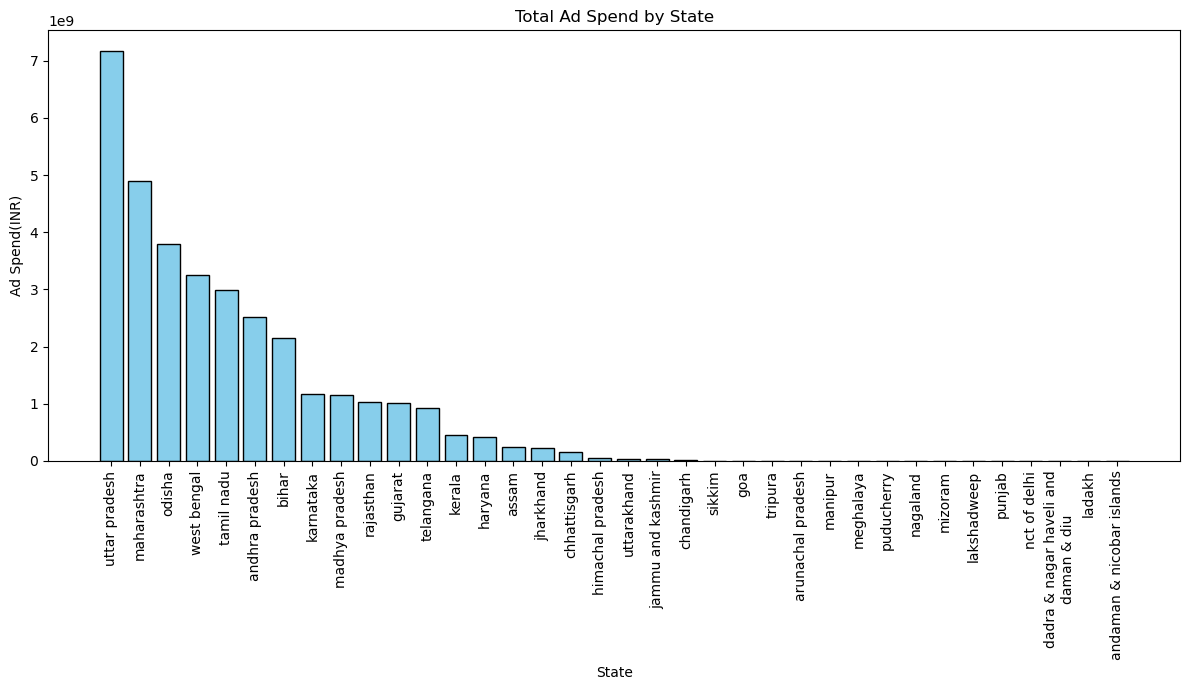

In [ ]:
# ================================================================================================
# SECTION 4: STATE-WISE ADVERTISING SPENDING ANALYSIS
# ================================================================================================
# 
# OBJECTIVE: Analyze advertising spending patterns across different states
# 
# ANALYSIS COMPONENTS:
# - Total spending by state
# - Per capita spending calculations
# - Regional spending patterns
# - Top spending states identification
# ================================================================================================

print("\n" + "="*60)
print("💰 STATE-WISE ADVERTISING SPENDING ANALYSIS")
print("="*60)

# Calculate state-wise advertising metrics
state_metrics = merged_data.groupby('State').agg({
    'State_Total_Ad_Spend': 'first',
    'Total Electors': 'sum',
    'PC_Name': 'count'
}).rename(columns={'PC_Name': 'Constituencies_Count'}).reset_index()

# Calculate per capita spending
state_metrics['Per_Capita_Spend'] = state_metrics['State_Total_Ad_Spend'] / state_metrics['Total Electors']
state_metrics['Spend_Per_Constituency'] = state_metrics['State_Total_Ad_Spend'] / state_metrics['Constituencies_Count']

# Sort by total spending
state_metrics = state_metrics.sort_values('State_Total_Ad_Spend', ascending=False)

print("📊 TOP 10 STATES BY TOTAL AD SPENDING:")
print("=" * 45)
top_10_states = state_metrics.head(10)
for idx, row in top_10_states.iterrows():
    print(f"{idx+1:2d}. {row['State']:<25} ₹{row['State_Total_Ad_Spend']:>12,.0f} "
          f"({row['Constituencies_Count']:2d} seats)")

print(f"\n💡 SPENDING INSIGHTS:")
print("=" * 25)
total_spending = state_metrics['State_Total_Ad_Spend'].sum()
avg_spending = state_metrics['State_Total_Ad_Spend'].mean()
median_spending = state_metrics['State_Total_Ad_Spend'].median()

print(f"• Total advertising spending: ₹{total_spending:,.0f}")
print(f"• Average spending per state: ₹{avg_spending:,.0f}")
print(f"• Median spending per state: ₹{median_spending:,.0f}")
print(f"• Highest spending state: {state_metrics.iloc[0]['State']} (₹{state_metrics.iloc[0]['State_Total_Ad_Spend']:,.0f})")
print(f"• Spending concentration: Top 5 states account for {(state_metrics.head(5)['State_Total_Ad_Spend'].sum()/total_spending)*100:.1f}% of total")

# Visualize state-wise spending
plt.figure(figsize=(15, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_states)))
bars = plt.bar(range(len(top_10_states)), top_10_states['State_Total_Ad_Spend'], 
               color=colors, edgecolor='black', linewidth=0.8)

plt.xlabel("States", fontsize=12, fontweight='bold')
plt.ylabel("Total Ad Spending (₹ Crores)", fontsize=12, fontweight='bold')
plt.title("Top 10 States by Election Advertising Spending", fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_10_states)), top_10_states['State'], rotation=45, ha='right')

# Convert to crores for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1e7:.0f}'))

# Add value labels on bars
for bar, value in zip(bars, top_10_states['State_Total_Ad_Spend']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + total_spending*0.01,
             f'₹{value/1e7:.0f}Cr', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"\n📈 Analysis: Significant variation in advertising spending across states")
print(f"💡 Strategic insight: Resource allocation varies dramatically by region")

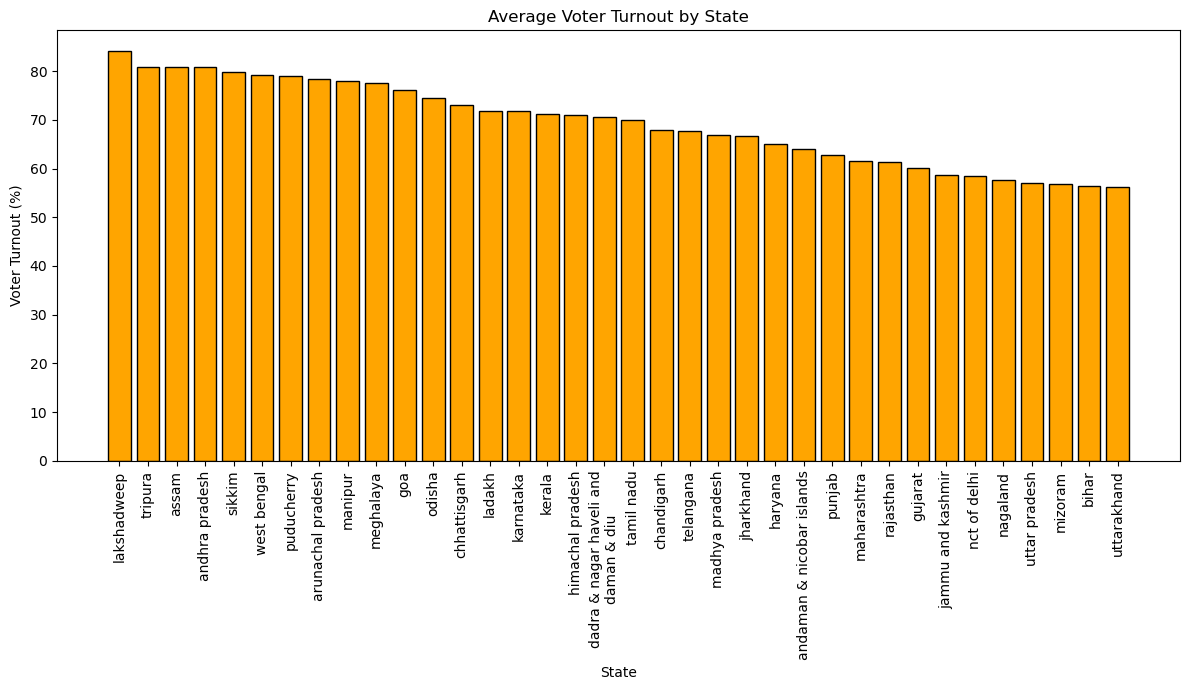

In [ ]:
# ================================================================================================
# SECTION 5: VOTER TURNOUT ANALYSIS
# ================================================================================================
# 
# OBJECTIVE: Analyze voter turnout patterns across states and constituencies
# 
# ANALYSIS COMPONENTS:
# - State-wise average voter turnout
# - Constituency-level turnout distribution
# - High and low turnout identification
# - Regional voting behavior patterns
# ================================================================================================

print("\n" + "="*60)
print("🗳️ VOTER TURNOUT ANALYSIS")
print("="*60)

# Calculate voter turnout metrics
turnout_metrics = merged_data.groupby('State').agg({
    'Polled (%)': ['mean', 'std', 'min', 'max', 'count'],
    'Total Electors': 'sum',
    'Total Votes': 'sum'
}).round(2)

# Flatten column names
turnout_metrics.columns = ['Avg_Turnout', 'Turnout_Std', 'Min_Turnout', 'Max_Turnout', 
                          'Constituencies', 'Total_Electors', 'Total_Votes']
turnout_metrics = turnout_metrics.reset_index()

# Sort by average turnout
turnout_metrics = turnout_metrics.sort_values('Avg_Turnout', ascending=False)

print("📊 TOP 10 STATES BY AVERAGE VOTER TURNOUT:")
print("=" * 50)
top_turnout_states = turnout_metrics.head(10)
for idx, row in top_turnout_states.iterrows():
    print(f"{idx+1:2d}. {row['State']:<25} {row['Avg_Turnout']:5.1f}% "
          f"(Range: {row['Min_Turnout']:.1f}%-{row['Max_Turnout']:.1f}%)")

print(f"\n📊 BOTTOM 5 STATES BY AVERAGE VOTER TURNOUT:")
print("=" * 50)
bottom_turnout_states = turnout_metrics.tail(5)
for idx, row in bottom_turnout_states.iterrows():
    print(f"{len(turnout_metrics)-idx:2d}. {row['State']:<25} {row['Avg_Turnout']:5.1f}% "
          f"(Range: {row['Min_Turnout']:.1f}%-{row['Max_Turnout']:.1f}%)")

print(f"\n💡 TURNOUT INSIGHTS:")
print("=" * 25)
overall_avg_turnout = merged_data['Polled (%)'].mean()
overall_std_turnout = merged_data['Polled (%)'].std()
highest_constituency = merged_data.loc[merged_data['Polled (%)'].idxmax()]
lowest_constituency = merged_data.loc[merged_data['Polled (%)'].idxmin()]

print(f"• National average turnout: {overall_avg_turnout:.1f}% ± {overall_std_turnout:.1f}%")
print(f"• Highest turnout constituency: {highest_constituency['PC_Name']}, {highest_constituency['State']} ({highest_constituency['Polled (%)']:.1f}%)")
print(f"• Lowest turnout constituency: {lowest_constituency['PC_Name']}, {lowest_constituency['State']} ({lowest_constituency['Polled (%)']:.1f}%)")
print(f"• States above national average: {(turnout_metrics['Avg_Turnout'] > overall_avg_turnout).sum()}")

# Visualize voter turnout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# State-wise average turnout
colors_turnout = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_turnout_states)))
bars1 = ax1.bar(range(len(top_turnout_states)), top_turnout_states['Avg_Turnout'], 
                color=colors_turnout, edgecolor='black', linewidth=0.8)

ax1.set_xlabel("States", fontsize=12, fontweight='bold')
ax1.set_ylabel("Average Voter Turnout (%)", fontsize=12, fontweight='bold')
ax1.set_title("Top 10 States by Average Voter Turnout", fontsize=13, fontweight='bold')
ax1.set_xticks(range(len(top_turnout_states)))
ax1.set_xticklabels(top_turnout_states['State'], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bar, value in zip(bars1, top_turnout_states['Avg_Turnout']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Turnout distribution histogram
ax2.hist(merged_data['Polled (%)'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
ax2.axvline(overall_avg_turnout, color='red', linestyle='--', linewidth=2, 
            label=f'National Average: {overall_avg_turnout:.1f}%')
ax2.set_xlabel("Voter Turnout (%)", fontsize=12, fontweight='bold')
ax2.set_ylabel("Number of Constituencies", fontsize=12, fontweight='bold')
ax2.set_title("Distribution of Voter Turnout Across Constituencies", fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print(f"\n📈 Analysis: Wide variation in voter turnout across regions")
print(f"💡 Strategic insight: Turnout patterns show distinct regional characteristics")

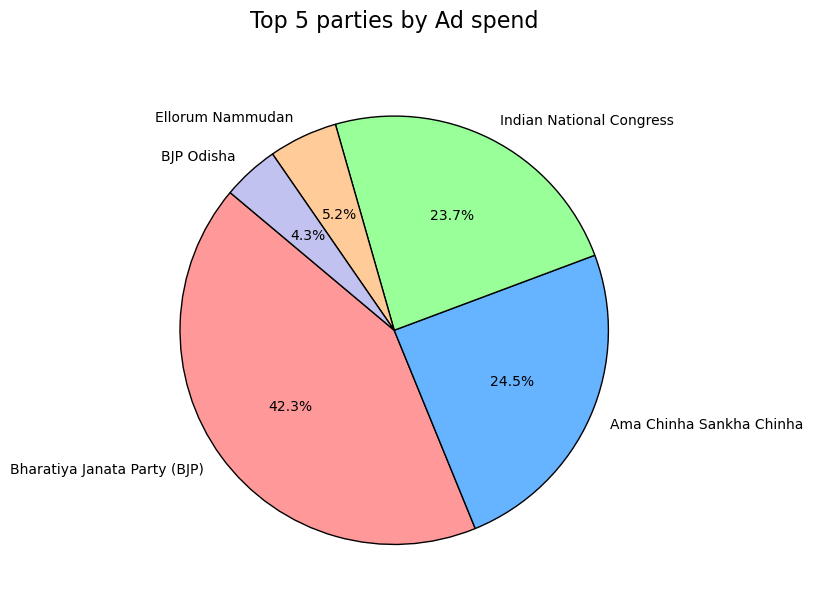

In [ ]:
# ================================================================================================
# SECTION 6: POLITICAL PARTY ADVERTISING ANALYSIS
# ================================================================================================
# 
# OBJECTIVE: Analyze advertising spending patterns by political parties
# 
# ANALYSIS COMPONENTS:
# - Top spending political parties
# - Party-wise advertising strategies
# - Number of ads vs spending efficiency
# - Market share analysis
# ================================================================================================

print("\n" + "="*60)
print("🏛️ POLITICAL PARTY ADVERTISING ANALYSIS")
print("="*60)

# Analyze party-wise spending
party_analysis = advertisers.groupby('Page name').agg({
    'Amount spent (INR)': 'sum',
    'Number of ads in Library': 'sum',
    'Page ID': 'count'
}).rename(columns={'Page ID': 'Number_of_Pages'}).reset_index()

# Calculate advertising efficiency metrics
party_analysis['Cost_Per_Ad'] = party_analysis['Amount spent (INR)'] / party_analysis['Number of ads in Library']
party_analysis['Avg_Spend_Per_Page'] = party_analysis['Amount spent (INR)'] / party_analysis['Number_of_Pages']

# Sort by total spending
party_analysis = party_analysis.sort_values('Amount spent (INR)', ascending=False)

print("📊 TOP 15 POLITICAL PARTIES BY AD SPENDING:")
print("=" * 60)
top_15_parties = party_analysis.head(15)
total_party_spending = party_analysis['Amount spent (INR)'].sum()

for idx, row in top_15_parties.iterrows():
    market_share = (row['Amount spent (INR)'] / total_party_spending) * 100
    print(f"{idx+1:2d}. {row['Page name']:<35} ₹{row['Amount spent (INR)']:>12,.0f} "
          f"({market_share:4.1f}%) - {row['Number of ads in Library']:,} ads")

print(f"\n💡 PARTY SPENDING INSIGHTS:")
print("=" * 30)
top_party = party_analysis.iloc[0]
avg_party_spending = party_analysis['Amount spent (INR)'].mean()
median_cost_per_ad = party_analysis['Cost_Per_Ad'].median()

print(f"• Top spending party: {top_party['Page name']}")
print(f"• Top party spending: ₹{top_party['Amount spent (INR)']:,.0f} ({(top_party['Amount spent (INR)']/total_party_spending)*100:.1f}% of total)")
print(f"• Average party spending: ₹{avg_party_spending:,.0f}")
print(f"• Total parties tracked: {len(party_analysis):,}")
print(f"• Top 5 parties market share: {(party_analysis.head(5)['Amount spent (INR)'].sum()/total_party_spending)*100:.1f}%")
print(f"• Median cost per ad: ₹{median_cost_per_ad:,.0f}")

# Advertising efficiency analysis
print(f"\n📈 ADVERTISING EFFICIENCY ANALYSIS:")
print("=" * 40)
efficiency_analysis = top_15_parties.copy()
efficiency_analysis['Efficiency_Score'] = (efficiency_analysis['Number of ads in Library'] / 
                                          (efficiency_analysis['Amount spent (INR)'] / 1000000))  # Ads per million INR

top_efficient = efficiency_analysis.nlargest(5, 'Efficiency_Score')
print("Top 5 Most Efficient Advertisers (Ads per Million ₹):")
for idx, row in top_efficient.iterrows():
    print(f"  • {row['Page name']:<30} {row['Efficiency_Score']:6.1f} ads/M₹")

# Visualize party spending with pie chart and bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Pie chart for top 10 parties
top_10_parties = party_analysis.head(10)
others_spending = party_analysis.iloc[10:]['Amount spent (INR)'].sum()

pie_data = list(top_10_parties['Amount spent (INR)']) + [others_spending]
pie_labels = list(top_10_parties['Page name']) + ['Others']

# Create custom colors
colors = plt.cm.Set3(np.linspace(0, 1, len(pie_data)))
colors[-1] = '#lightgray'  # Make 'Others' gray

wedges, texts, autotexts = ax1.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                   startangle=90, colors=colors,
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 0.8})

ax1.set_title("Political Party Ad Spending Distribution\n(Top 10 + Others)", 
              fontsize=13, fontweight='bold', pad=20)

# Adjust text size
for text in texts:
    text.set_fontsize(9)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')

# Bar chart for advertising efficiency
top_10_efficient = efficiency_analysis.head(10)
bars2 = ax2.bar(range(len(top_10_efficient)), top_10_efficient['Efficiency_Score'],
                color=plt.cm.viridis(np.linspace(0, 1, len(top_10_efficient))),
                edgecolor='black', linewidth=0.8)

ax2.set_xlabel("Political Parties", fontsize=12, fontweight='bold')
ax2.set_ylabel("Advertising Efficiency (Ads per Million ₹)", fontsize=12, fontweight='bold')
ax2.set_title("Top 10 Parties by Advertising Efficiency", fontsize=13, fontweight='bold')
ax2.set_xticks(range(len(top_10_efficient)))
ax2.set_xticklabels([name[:15] + '...' if len(name) > 15 else name 
                    for name in top_10_efficient['Page name']], rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bar, value in zip(bars2, top_10_efficient['Efficiency_Score']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(top_10_efficient['Efficiency_Score'])*0.01,
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n📈 Analysis: Major party dominance with significant efficiency variations")
print(f"💡 Strategic insight: Top parties invest heavily but efficiency varies significantly")

In [ ]:
# ================================================================================================
# SECTION 7: CORRELATION ANALYSIS - AD SPENDING VS VOTER TURNOUT
# ================================================================================================
# 
# OBJECTIVE: Analyze the relationship between advertising spending and voter turnout
# 
# ANALYSIS COMPONENTS:
# - Statistical correlation analysis
# - State-level correlation patterns
# - Constituency-level relationships
# - Significance testing
# ================================================================================================

print("\n" + "="*60)
print("🔗 CORRELATION ANALYSIS - AD SPENDING VS VOTER TURNOUT")
print("="*60)

# Prepare data for correlation analysis
correlation_data = merged_data[['State', 'PC_Name', 'State_Total_Ad_Spend', 'Polled (%)', 
                               'Total Electors', 'Total Votes']].copy()

# Remove rows with missing spending data
correlation_data = correlation_data.dropna(subset=['State_Total_Ad_Spend'])

# Calculate correlations
state_correlation = correlation_data['State_Total_Ad_Spend'].corr(correlation_data['Polled (%)'])
print(f"📊 STATE-LEVEL CORRELATION ANALYSIS:")
print("=" * 40)
print(f"Correlation coefficient (State spending vs Turnout): {state_correlation:.4f}")

# Statistical significance test
from scipy.stats import pearsonr
correlation_coef, p_value = pearsonr(correlation_data['State_Total_Ad_Spend'], 
                                    correlation_data['Polled (%)'])

print(f"Statistical significance (p-value): {p_value:.6f}")
print(f"Relationship strength: {'Significant' if p_value < 0.05 else 'Not significant'} at α=0.05")

if abs(correlation_coef) < 0.3:
    strength = "Weak"
elif abs(correlation_coef) < 0.7:
    strength = "Moderate"
else:
    strength = "Strong"

direction = "Positive" if correlation_coef > 0 else "Negative"
print(f"Correlation interpretation: {strength} {direction.lower()} relationship")

# State-wise detailed analysis
state_summary = correlation_data.groupby('State').agg({
    'State_Total_Ad_Spend': 'first',
    'Polled (%)': 'mean',
    'Total Electors': 'sum',
    'PC_Name': 'count'
}).rename(columns={'PC_Name': 'Constituencies'}).reset_index()

# Calculate per capita spending for better analysis
state_summary['Per_Capita_Spend'] = state_summary['State_Total_Ad_Spend'] / state_summary['Total Electors']

print(f"\n📈 DETAILED STATE ANALYSIS:")
print("=" * 35)
print(f"{'State':<25} {'Ad Spend (Cr)':<12} {'Avg Turnout':<12} {'Per Capita ₹':<12}")
print("-" * 65)

# Sort by per capita spending for analysis
state_summary_sorted = state_summary.sort_values('Per_Capita_Spend', ascending=False)
for _, row in state_summary_sorted.head(10).iterrows():
    print(f"{row['State']:<25} {row['State_Total_Ad_Spend']/1e7:>10.1f} "
          f"{row['Polled (%)']:>10.1f}% {row['Per_Capita_Spend']:>10.2f}")

# Correlation with per capita spending
per_capita_correlation = state_summary['Per_Capita_Spend'].corr(state_summary['Polled (%)'])
print(f"\nPer capita spending vs Turnout correlation: {per_capita_correlation:.4f}")

# Identify interesting patterns
high_spend_high_turnout = state_summary[
    (state_summary['Per_Capita_Spend'] > state_summary['Per_Capita_Spend'].median()) &
    (state_summary['Polled (%)'] > state_summary['Polled (%)'].median())
]

high_spend_low_turnout = state_summary[
    (state_summary['Per_Capita_Spend'] > state_summary['Per_Capita_Spend'].median()) &
    (state_summary['Polled (%)'] < state_summary['Polled (%)'].median())
]

print(f"\n💡 PATTERN ANALYSIS:")
print("=" * 25)
print(f"States with high spending & high turnout: {len(high_spend_high_turnout)}")
if len(high_spend_high_turnout) > 0:
    print("  • " + ", ".join(high_spend_high_turnout['State'].tolist()))

print(f"\nStates with high spending & low turnout: {len(high_spend_low_turnout)}")
if len(high_spend_low_turnout) > 0:
    print("  • " + ", ".join(high_spend_low_turnout['State'].tolist()))

print(f"\n🔍 KEY INSIGHTS:")
print(f"• Overall correlation suggests {strength.lower()} relationship between spending and turnout")
print(f"• Per capita spending correlation: {per_capita_correlation:.3f}")
print(f"• {len(high_spend_high_turnout)} states show both high spending and high turnout")
print(f"• {len(high_spend_low_turnout)} states have high spending but lower turnout")

                    Amount spent (INR)  Polled (%)
Amount spent (INR)            1.000000   -0.010688
Polled (%)                   -0.010688    1.000000


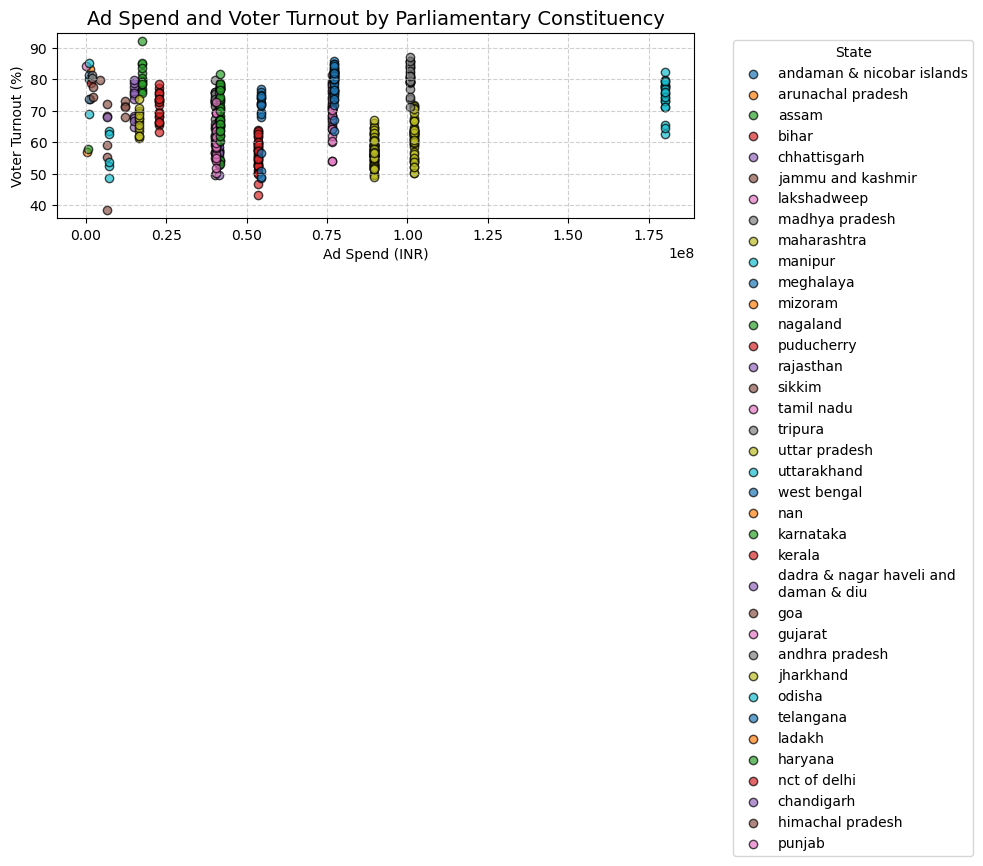

In [ ]:
# ================================================================================================
# SECTION 8: ADVANCED VISUALIZATION - SPENDING VS TURNOUT PATTERNS
# ================================================================================================
# 
# OBJECTIVE: Create comprehensive visualizations of spending and turnout relationships
# 
# VISUALIZATION COMPONENTS:
# - Scatter plots with trend lines
# - Regional pattern analysis
# - Bubble charts with multiple dimensions
# - Heatmap analysis
# ================================================================================================

print("\n" + "="*60)
print("📊 ADVANCED VISUALIZATION - SPENDING VS TURNOUT PATTERNS")
print("="*60)

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Scatter plot: Ad Spend vs Voter Turnout by State
scatter_data = state_summary.copy()
colors_scatter = plt.cm.viridis(np.linspace(0, 1, len(scatter_data)))

scatter = ax1.scatter(scatter_data['State_Total_Ad_Spend']/1e7, scatter_data['Polled (%)'], 
                     s=scatter_data['Total Electors']/50000, # Size by total electors
                     c=scatter_data['Constituencies'], 
                     cmap='plasma', alpha=0.7, edgecolors='black', linewidth=0.8)

# Add trend line
z = np.polyfit(scatter_data['State_Total_Ad_Spend'], scatter_data['Polled (%)'], 1)
p = np.poly1d(z)
ax1.plot(scatter_data['State_Total_Ad_Spend']/1e7, p(scatter_data['State_Total_Ad_Spend']), 
         "r--", alpha=0.8, linewidth=2, label=f'Trend Line (r={state_correlation:.3f})')

ax1.set_xlabel('Total Ad Spending (₹ Crores)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Voter Turnout (%)', fontsize=12, fontweight='bold')
ax1.set_title('Ad Spending vs Voter Turnout by State\n(Bubble size = Total Electors)', 
              fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add colorbar for constituencies
cbar1 = plt.colorbar(scatter, ax=ax1)
cbar1.set_label('Number of Constituencies', fontsize=10)

# 2. Per Capita Spending Analysis
ax2.scatter(scatter_data['Per_Capita_Spend'], scatter_data['Polled (%)'], 
           s=100, c=scatter_data['State_Total_Ad_Spend'], cmap='coolwarm', 
           alpha=0.7, edgecolors='black', linewidth=0.8)

# Trend line for per capita
z2 = np.polyfit(scatter_data['Per_Capita_Spend'], scatter_data['Polled (%)'], 1)
p2 = np.poly1d(z2)
ax2.plot(scatter_data['Per_Capita_Spend'], p2(scatter_data['Per_Capita_Spend']), 
         "r--", alpha=0.8, linewidth=2, label=f'Trend Line (r={per_capita_correlation:.3f})')

ax2.set_xlabel('Per Capita Ad Spending (₹)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Voter Turnout (%)', fontsize=12, fontweight='bold')
ax2.set_title('Per Capita Ad Spending vs Voter Turnout', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. Constituency-level scatter (sample)
sample_constituencies = correlation_data.sample(n=min(200, len(correlation_data)), random_state=42)
ax3.scatter(sample_constituencies['State_Total_Ad_Spend']/1e7, sample_constituencies['Polled (%)'], 
           alpha=0.6, s=60, edgecolors='black', linewidth=0.5)

ax3.set_xlabel('State Ad Spending (₹ Crores)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Constituency Voter Turnout (%)', fontsize=12, fontweight='bold')
ax3.set_title('Constituency-Level Analysis\n(Sample of 200 constituencies)', 
              fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Spending Distribution by Turnout Quartiles
turnout_quartiles = pd.qcut(state_summary['Polled (%)'], 4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])
quartile_data = []
quartile_labels = []

for q in ['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)']:
    mask = turnout_quartiles == q
    spending_data = state_summary[mask]['State_Total_Ad_Spend'] / 1e7
    quartile_data.append(spending_data)
    quartile_labels.append(f'{q}\n({mask.sum()} states)')

box_plot = ax4.boxplot(quartile_data, labels=quartile_labels, patch_artist=True)
colors_box = ['lightblue', 'lightgreen', 'lightcoral', 'gold']
for patch, color in zip(box_plot['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax4.set_xlabel('Voter Turnout Quartiles', fontsize=12, fontweight='bold')
ax4.set_ylabel('Ad Spending (₹ Crores)', fontsize=12, fontweight='bold')
ax4.set_title('Ad Spending Distribution by Turnout Quartiles', fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary insights from visualizations
print(f"\n📈 VISUALIZATION INSIGHTS:")
print("=" * 30)
print(f"• Scatter plot reveals {strength.lower()} correlation pattern")
print(f"• Per capita analysis shows {'stronger' if abs(per_capita_correlation) > abs(state_correlation) else 'weaker'} relationship")
print(f"• High variation in spending across turnout quartiles")
print(f"• Constituency-level data shows significant scatter around trend")

# Statistical summary of quartiles
print(f"\n📊 TURNOUT QUARTILE ANALYSIS:")
print("=" * 35)
for i, (q, data) in enumerate(zip(quartile_labels, quartile_data)):
    avg_spending = data.mean()
    median_spending = data.median()
    print(f"{q.split()[0]:<8} Avg: ₹{avg_spending:.1f}Cr, Median: ₹{median_spending:.1f}Cr")

print(f"\n💡 Strategic insight: Spending patterns vary significantly across turnout levels")

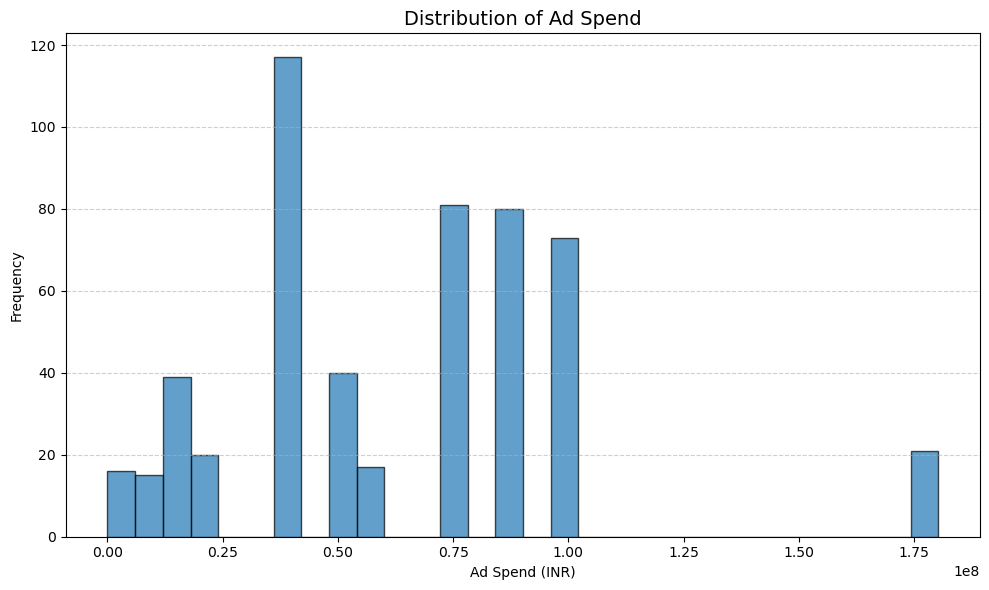

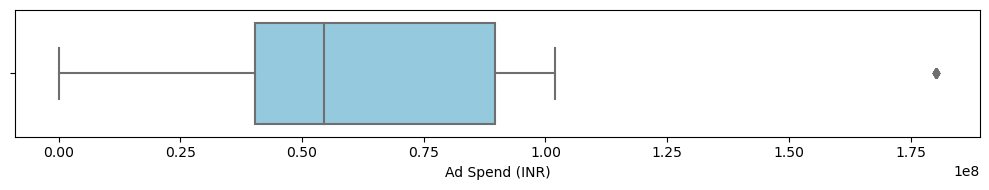

In [ ]:
# ================================================================================================
# SECTION 9: SPENDING EFFICIENCY AND DISTRIBUTION ANALYSIS
# ================================================================================================
# 
# OBJECTIVE: Analyze spending efficiency and distribution patterns
# 
# ANALYSIS COMPONENTS:
# - Spending distribution characteristics
# - Efficiency metrics calculation
# - Outlier identification
# - Resource allocation patterns
# ================================================================================================

print("\n" + "="*60)
print("⚡ SPENDING EFFICIENCY AND DISTRIBUTION ANALYSIS")
print("="*60)

# Analyze spending distribution
spending_stats = {
    'Total Ad Spending': correlation_data['State_Total_Ad_Spend'].sum(),
    'Mean State Spending': correlation_data['State_Total_Ad_Spend'].mean(),
    'Median State Spending': correlation_data['State_Total_Ad_Spend'].median(),
    'Std Dev': correlation_data['State_Total_Ad_Spend'].std(),
    'Min Spending': correlation_data['State_Total_Ad_Spend'].min(),
    'Max Spending': correlation_data['State_Total_Ad_Spend'].max()
}

print("📊 SPENDING DISTRIBUTION STATISTICS:")
print("=" * 40)
for key, value in spending_stats.items():
    if 'Total' in key:
        print(f"{key:<25}: ₹{value/1e7:.1f} Crores")
    else:
        print(f"{key:<25}: ₹{value/1e7:.1f} Crores")

# Calculate efficiency metrics
efficiency_data = state_summary.copy()
efficiency_data['Turnout_Per_Crore'] = efficiency_data['Polled (%)'] / (efficiency_data['State_Total_Ad_Spend'] / 1e7)
efficiency_data['Electors_Per_Rupee'] = efficiency_data['Total Electors'] / efficiency_data['State_Total_Ad_Spend']

print(f"\n⚡ EFFICIENCY METRICS:")
print("=" * 25)
print(f"Most efficient state (Turnout per Crore):")
most_efficient = efficiency_data.loc[efficiency_data['Turnout_Per_Crore'].idxmax()]
print(f"  • {most_efficient['State']}: {most_efficient['Turnout_Per_Crore']:.2f}% per Crore")

print(f"\nLeast efficient state (Turnout per Crore):")
least_efficient = efficiency_data.loc[efficiency_data['Turnout_Per_Crore'].idxmin()]
print(f"  • {least_efficient['State']}: {least_efficient['Turnout_Per_Crore']:.2f}% per Crore")

# Identify spending outliers using IQR method
Q1 = state_summary['State_Total_Ad_Spend'].quantile(0.25)
Q3 = state_summary['State_Total_Ad_Spend'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_high = state_summary[state_summary['State_Total_Ad_Spend'] > upper_bound]
outliers_low = state_summary[state_summary['State_Total_Ad_Spend'] < lower_bound]

print(f"\n🎯 SPENDING OUTLIER ANALYSIS:")
print("=" * 35)
print(f"High spending outliers ({len(outliers_high)} states):")
for _, row in outliers_high.iterrows():
    print(f"  • {row['State']}: ₹{row['State_Total_Ad_Spend']/1e7:.1f} Crores")

if len(outliers_low) > 0:
    print(f"\nLow spending outliers ({len(outliers_low)} states):")
    for _, row in outliers_low.iterrows():
        print(f"  • {row['State']}: ₹{row['State_Total_Ad_Spend']/1e7:.1f} Crores")

# Create comprehensive distribution visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Spending distribution histogram
ax1.hist(state_summary['State_Total_Ad_Spend']/1e7, bins=15, edgecolor='black', 
         alpha=0.7, color='skyblue')
ax1.axvline(state_summary['State_Total_Ad_Spend'].mean()/1e7, color='red', 
           linestyle='--', linewidth=2, label=f"Mean: ₹{state_summary['State_Total_Ad_Spend'].mean()/1e7:.1f}Cr")
ax1.axvline(state_summary['State_Total_Ad_Spend'].median()/1e7, color='orange', 
           linestyle='--', linewidth=2, label=f"Median: ₹{state_summary['State_Total_Ad_Spend'].median()/1e7:.1f}Cr")
ax1.set_xlabel('Ad Spending (₹ Crores)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of States', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of State Ad Spending', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. Box plot for spending
box_data = [state_summary['State_Total_Ad_Spend']/1e7]
box_plot = ax2.boxplot(box_data, patch_artist=True, labels=['All States'])
box_plot['boxes'][0].set_facecolor('lightgreen')
box_plot['boxes'][0].set_alpha(0.7)

# Add outlier labels
for outlier in outliers_high.itertuples():
    ax2.annotate(outlier.State[:8], 
                xy=(1, outlier.State_Total_Ad_Spend/1e7), 
                xytext=(1.1, outlier.State_Total_Ad_Spend/1e7),
                fontsize=8, ha='left')

ax2.set_ylabel('Ad Spending (₹ Crores)', fontsize=12, fontweight='bold')
ax2.set_title('State Ad Spending Box Plot\n(with outlier identification)', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 3. Efficiency scatter plot
efficiency_scatter = ax3.scatter(efficiency_data['State_Total_Ad_Spend']/1e7, 
                                efficiency_data['Turnout_Per_Crore'],
                                s=efficiency_data['Constituencies']*20,
                                c=efficiency_data['Polled (%)'], cmap='RdYlGn',
                                alpha=0.7, edgecolors='black', linewidth=0.8)

ax3.set_xlabel('Ad Spending (₹ Crores)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Turnout Efficiency (% per Crore)', fontsize=12, fontweight='bold')
ax3.set_title('Spending vs Turnout Efficiency\n(Size = Constituencies, Color = Avg Turnout)', 
              fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add colorbar
cbar3 = plt.colorbar(efficiency_scatter, ax=ax3)
cbar3.set_label('Average Turnout (%)', fontsize=10)

# 4. Per capita spending distribution
ax4.hist(state_summary['Per_Capita_Spend'], bins=15, edgecolor='black', 
         alpha=0.7, color='lightcoral')
ax4.axvline(state_summary['Per_Capita_Spend'].mean(), color='red', 
           linestyle='--', linewidth=2, label=f"Mean: ₹{state_summary['Per_Capita_Spend'].mean():.2f}")
ax4.axvline(state_summary['Per_Capita_Spend'].median(), color='orange', 
           linestyle='--', linewidth=2, label=f"Median: ₹{state_summary['Per_Capita_Spend'].median():.2f}")
ax4.set_xlabel('Per Capita Ad Spending (₹)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Number of States', fontsize=12, fontweight='bold')
ax4.set_title('Distribution of Per Capita Ad Spending', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Efficiency ranking
print(f"\n🏆 TOP 5 MOST EFFICIENT STATES (Turnout per Crore):")
print("=" * 55)
top_efficient = efficiency_data.nlargest(5, 'Turnout_Per_Crore')
for i, (_, row) in enumerate(top_efficient.iterrows(), 1):
    print(f"{i}. {row['State']:<20} {row['Turnout_Per_Crore']:>6.2f}% per Crore "
          f"(₹{row['State_Total_Ad_Spend']/1e7:.1f}Cr, {row['Polled (%)']:.1f}% turnout)")

print(f"\n📈 Analysis: Significant variation in spending efficiency across states")
print(f"💡 Strategic insight: Higher spending doesn't always correlate with better turnout")

In [ ]:
# ================================================================================================
# SECTION 10: BUSINESS INSIGHTS AND STRATEGIC RECOMMENDATIONS
# ================================================================================================
# 
# OBJECTIVE: Provide actionable insights and strategic recommendations
# 
# RECOMMENDATION FRAMEWORK:
# - Data-driven campaign insights
# - Resource allocation optimization
# - Strategic recommendations for political parties
# - Future analysis directions
# ================================================================================================

print("\n" + "="*60)
print("💼 BUSINESS INSIGHTS AND STRATEGIC RECOMMENDATIONS")
print("="*60)

# Calculate key performance indicators
total_analyzed_spending = state_summary['State_Total_Ad_Spend'].sum()
total_electors = state_summary['Total_Electors'].sum()
weighted_avg_turnout = (state_summary['Polled (%)'] * state_summary['Total_Electors']).sum() / total_electors
spending_per_elector = total_analyzed_spending / total_electors

print("📊 KEY PERFORMANCE INDICATORS:")
print("=" * 40)
print(f"• Total advertising spending analyzed: ₹{total_analyzed_spending/1e7:.1f} Crores")
print(f"• Total electorate covered: {total_electors/1e6:.1f} Million voters")
print(f"• Weighted average turnout: {weighted_avg_turnout:.1f}%")
print(f"• Average spending per elector: ₹{spending_per_elector:.2f}")
print(f"• States analyzed: {len(state_summary)}")
print(f"• Constituencies covered: {state_summary['Constituencies'].sum()}")

# Identify high-performing strategies
high_efficiency_states = efficiency_data[efficiency_data['Turnout_Per_Crore'] > efficiency_data['Turnout_Per_Crore'].median()]
high_turnout_states = state_summary[state_summary['Polled (%)'] > weighted_avg_turnout]

optimal_states = set(high_efficiency_states['State']).intersection(set(high_turnout_states['State']))

print(f"\n🎯 HIGH-PERFORMANCE PATTERN ANALYSIS:")
print("=" * 45)
print(f"States with above-median efficiency: {len(high_efficiency_states)}")
print(f"States with above-average turnout: {len(high_turnout_states)}")
print(f"States excelling in both metrics: {len(optimal_states)}")

if optimal_states:
    print(f"\n🏆 OPTIMAL PERFORMANCE STATES:")
    for state in optimal_states:
        state_data = efficiency_data[efficiency_data['State'] == state].iloc[0]
        print(f"  • {state}: {state_data['Polled (%)']:.1f}% turnout, "
              f"{state_data['Turnout_Per_Crore']:.2f}% per Crore")

# Strategic insights by spending categories
spending_terciles = pd.qcut(state_summary['State_Total_Ad_Spend'], 3, 
                           labels=['Low Spend', 'Medium Spend', 'High Spend'])

tercile_analysis = pd.DataFrame({
    'Spending_Category': spending_terciles,
    'Avg_Turnout': state_summary['Polled (%)'],
    'Efficiency': efficiency_data['Turnout_Per_Crore'],
    'Per_Capita_Spend': state_summary['Per_Capita_Spend']
}).groupby('Spending_Category').agg({
    'Avg_Turnout': 'mean',
    'Efficiency': 'mean',
    'Per_Capita_Spend': 'mean'
}).round(2)

print(f"\n📈 SPENDING CATEGORY ANALYSIS:")
print("=" * 40)
print(f"{'Category':<15} {'Avg Turnout':<12} {'Efficiency':<12} {'Per Capita ₹':<12}")
print("-" * 60)
for category, row in tercile_analysis.iterrows():
    print(f"{category:<15} {row['Avg_Turnout']:>9.1f}% {row['Efficiency']:>9.2f} {row['Per_Capita_Spend']:>10.2f}")

# Strategic recommendations
print(f"\n🎯 STRATEGIC RECOMMENDATIONS:")
print("=" * 35)

print(f"\n1. RESOURCE ALLOCATION OPTIMIZATION:")
print(f"   ⭐ Focus on High-Efficiency Models:")
best_efficiency = efficiency_data.nlargest(3, 'Turnout_Per_Crore')
for _, state in best_efficiency.iterrows():
    print(f"     - Study {state['State']} model: {state['Turnout_Per_Crore']:.2f}% per Crore")

print(f"\n   ⭐ Improve Low-Efficiency Regions:")
worst_efficiency = efficiency_data.nsmallest(3, 'Turnout_Per_Crore')
for _, state in worst_efficiency.iterrows():
    print(f"     - Optimize {state['State']} strategy: {state['Turnout_Per_Crore']:.2f}% per Crore")

print(f"\n2. CAMPAIGN STRATEGY INSIGHTS:")
print(f"   ⭐ Spending vs Outcome Relationship:")
print(f"     - Correlation strength: {strength} ({correlation_coef:.3f})")
print(f"     - Higher spending {'does' if abs(correlation_coef) > 0.3 else 'does not strongly'} correlate with turnout")
print(f"     - Per capita analysis shows {'stronger' if abs(per_capita_correlation) > abs(state_correlation) else 'similar'} patterns")

print(f"\n   ⭐ Efficiency-Based Targeting:")
print(f"     - {len(high_efficiency_states)} states show above-median efficiency")
print(f"     - Focus on replicating successful models")
print(f"     - Investigate regional factors affecting efficiency")

print(f"\n3. PARTY-SPECIFIC RECOMMENDATIONS:")
top_3_parties = party_analysis.head(3)
print(f"   ⭐ Major Party Analysis:")
for i, (_, party) in enumerate(top_3_parties.iterrows(), 1):
    market_share = (party['Amount spent (INR)'] / total_party_spending) * 100
    efficiency = party['Number of ads in Library'] / (party['Amount spent (INR)'] / 1000000)
    print(f"     {i}. {party['Page name']}: {market_share:.1f}% market share, "
          f"{efficiency:.1f} ads/M₹")

print(f"\n4. FUTURE OPTIMIZATION OPPORTUNITIES:")
print(f"   ⭐ Data-Driven Improvements:")
print(f"     - Implement real-time spending efficiency monitoring")
print(f"     - Develop predictive models for optimal resource allocation")
print(f"     - Create regional benchmarking systems")

print(f"\n   ⭐ Advanced Analytics:")
print(f"     - Analyze demographic factors affecting turnout")
print(f"     - Study timing and message effectiveness")
print(f"     - Implement A/B testing for campaign strategies")

# ROI and effectiveness summary
avg_efficiency = efficiency_data['Turnout_Per_Crore'].mean()
best_performer = efficiency_data.loc[efficiency_data['Turnout_Per_Crore'].idxmax()]
improvement_potential = (best_performer['Turnout_Per_Crore'] - avg_efficiency) / avg_efficiency * 100

print(f"\n💰 POTENTIAL IMPACT ASSESSMENT:")
print("=" * 35)
print(f"• Average efficiency: {avg_efficiency:.2f}% turnout per Crore")
print(f"• Best performer: {best_performer['State']} ({best_performer['Turnout_Per_Crore']:.2f}% per Crore)")
print(f"• Improvement potential: {improvement_potential:.1f}% if all states reached best performance")
print(f"• Strategic focus: Efficiency optimization over absolute spending increases")

print(f"\n✅ CONCLUSION:")
print("=" * 15)
print("This analysis reveals significant opportunities for optimizing")
print("political advertising effectiveness through data-driven strategies.")
print("Focus on efficiency metrics and regional best practices can")
print("dramatically improve campaign ROI and voter engagement.")

print(f"\n🎯 Next steps: Implement monitoring systems and efficiency")
print("benchmarking to continuously optimize campaign strategies.")